# 3.Modeling<a id='3.Modeling'></a>



## 3.1 Contents<a id='3.1_Contents'></a>

  * [3.2 Introduction](#3.2_Introduction)   
  * [3.3 Load The Data](#3.3_Load_The_Data)  
  * [3.4 ](#2.4_Split_Data_in_categorical_and_non_categorical_features)
  
  * [3.5 ](#2.5)
      
  * [3.6 ](#2.6_)
  * [3.7 ](#2.7_)
  
  * [3.8 ](#2.8_)
  * [3.9 Save data](#2.9_Save_data)
  * [3.10 Summary](#2.10_Summary)

## 3.2 Introduction<a id='3.2_Introduction'></a>

In the modeling phase of our notebook, we aim to predict house prices accurately. By leveraging various techniques such as data preprocessing, feature engineering, model selection, training, evaluation, and fine-tuning, we strive to develop effective models. The iterative process helps us experiment with different approaches and optimize the model's performance to make accurate price predictions for houses.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import os
import numpy as np
%matplotlib inline
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
import pickle
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,mean_absolute_percentage_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
from sklearn.neighbors import KNeighborsRegressor


from library.sb_utils import save_file

### 3.3 Load The Data<a id='3.3_Load_The_Data'></a>

[<a href="#3.Modeling">Back to top</a>]

In [2]:
house_data = pd.read_csv('./cleaned_data/house_data_cleaned_2.csv') 

In [3]:
house_data.shape

(1460, 74)

In [4]:
house_data.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,House_age
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,2,2008,WD,Normal,208500,20
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,5,2007,WD,Normal,181500,47
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,9,2008,WD,Normal,223500,22
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,0,0,0,2,2006,WD,Abnorml,140000,108
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,12,2008,WD,Normal,250000,23


In [5]:
house_data.isnull().sum().sort_values(ascending=False) # check for any missing values

MSSubClass      0
GarageFinish    0
FireplaceQu     0
Fireplaces      0
Functional      0
               ..
ExterCond       0
ExterQual       0
MasVnrArea      0
MasVnrType      0
House_age       0
Length: 74, dtype: int64

In [6]:
house_data.select_dtypes(include='object').nunique() # check no. of unique values for categorical data

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        5
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          5
BsmtCond          5
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        6
KitchenQual       4
Functional        7
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [7]:
# Separate Independent and dependent variables

X = house_data.drop("SalePrice", axis=1)

y = house_data[["SalePrice"]]

In [8]:
X

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,House_age
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,20
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,47
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,22
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,108
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,24
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,45
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,82
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,112,0,0,0,0,4,2010,WD,Normal,73


[<a href="#3.Modeling">Back to top</a>]

In [9]:
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


### Create dummy variables to deal with categorical inputs

In [10]:
X = pd.get_dummies(X, dtype='int64') # changed all the categorical values to dummy variables

In [11]:
X

,MSSubClass,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,196.0,706,0,150,856,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,0.0,978,0,284,1262,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2002,162.0,486,0,434,920,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1970,0.0,216,0,540,756,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,350.0,655,0,490,1145,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,2000,0.0,0,0,953,953,...,0,0,0,1,0,0,0,0,1,0
1456,20,13175,6,6,1988,119.0,790,163,589,1542,...,0,0,0,1,0,0,0,0,1,0
1457,70,9042,7,9,2006,0.0,275,0,877,1152,...,0,0,0,1,0,0,0,0,1,0
1458,20,9717,5,6,1996,0.0,49,1029,0,1078,...,0,0,0,1,0,0,0,0,1,0


In [12]:
X.dtypes

MSSubClass               int64
LotArea                  int64
OverallQual              int64
OverallCond              int64
YearRemodAdd             int64
                         ...  
SaleCondition_AdjLand    int64
SaleCondition_Alloca     int64
SaleCondition_Family     int64
SaleCondition_Normal     int64
SaleCondition_Partial    int64
Length: 285, dtype: object

### Train/Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

In [14]:
X_train.shape, X_test.shape

((1022, 285), (438, 285))

In [15]:
y_train.shape, y_test.shape

((1022, 1), (438, 1))

### 3.4 Baseline model Using Linear regression:<a id='3.3_Load_The_Data'></a>

In [16]:
lm = LinearRegression().fit(X_train, y_train)

In [17]:
y_tr_pred = lm.predict(X_train)
y_te_pred = lm.predict(X_test)

In [18]:
mae = mean_absolute_error(y_train, y_tr_pred),mean_absolute_error(y_test, y_te_pred)
mae

(12674.45994700751, 533477115.53844345)

In [19]:
mape = mean_absolute_percentage_error(y_test, y_te_pred)
mape

3632.0487825436453

In [20]:
y_test = y_test.reset_index(drop=True) # reset index
y_test

,SalePrice
0,240000
1,185000
2,168500
3,430000
4,127000
...,...
433,138500
434,118400
435,149000
436,426000


In [21]:
# convert to dadaframe
y_te_pred=pd.DataFrame(y_te_pred)

[<a href="#3.Modeling">Back to top</a>]

In [22]:
y_te_pred

,0
0,238702.127533
1,196363.375916
2,279261.400177
3,394181.908691
4,132319.249634
...,...
433,132185.477661
434,126016.158295
435,133603.719040
436,402138.758575


In [23]:
# merege y_test and y_te_pre to  perform evaluation

test_data = pd.merge(y_test, y_te_pred, left_index=True, right_index=True)
test_data .columns = ['Actual', 'Predicted']


In [24]:
test_data['Predicted'] = test_data['Predicted'].astype(int)

In [25]:
test_data

,Actual,Predicted
0,240000,238702
1,185000,196363
2,168500,279261
3,430000,394181
4,127000,132319
...,...,...
433,138500,132185
434,118400,126016
435,149000,133603
436,426000,402138


In [26]:
test_data['AbsoluteError'] = np.abs(test_data['Actual'] - test_data['Predicted']) # PE = absolute(Actual - Predicted)

In [27]:
test_data['PercentageError'] = (test_data['AbsoluteError'] / test_data['Actual']) * 100 # PercentageError

In [28]:
test_data['PercentageError'] = test_data['PercentageError'].round(2)
column_values=test_data['PercentageError']
Wrong_values = column_values[column_values > 100]# getting very high PercentageError in some values
Wrong_values 

39     1133219.94
47     2419818.83
86     1130354.55
104    2147583.65
119        220.98
211     756256.21
238    2045322.52
293    1561906.29
325    1664816.01
327     452201.82
340     776622.75
355    3520565.00
387     826055.25
Name: PercentageError, dtype: float64

In [29]:
test_data

,Actual,Predicted,AbsoluteError,PercentageError
0,240000,238702,1298,0.54
1,185000,196363,11363,6.14
2,168500,279261,110761,65.73
3,430000,394181,35819,8.33
4,127000,132319,5319,4.19
...,...,...,...,...
433,138500,132185,6315,4.56
434,118400,126016,7616,6.43
435,149000,133603,15397,10.33
436,426000,402138,23862,5.60


<font color=blue>__Actual-vs Predicted scatterplot__

Text(0.5, 1.0, 'Scatter Plot: Actual vs Predicted')

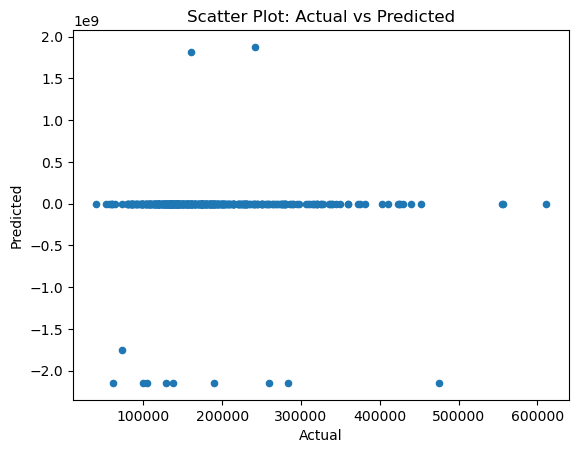

In [30]:
test_data.plot(x='Actual', y='Predicted', kind='scatter')
plt.title('Scatter Plot: Actual vs Predicted')

[<a href="#3.Modeling">Back to top</a>]

<font color=blue>__Histograms showing distribution of residuals with the test set__


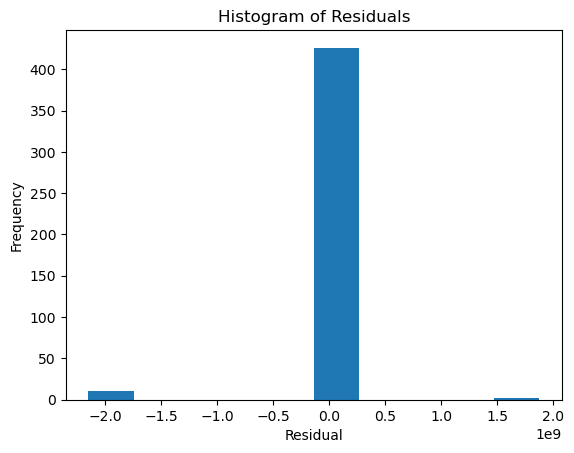

In [31]:
# Calculate residuals
residuals = [predicted - actual for predicted, actual in zip(test_data['Predicted'], test_data['Actual'])]

# Create histogram
plt.hist(residuals)  # Adjust the number of bins as per your preference
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


### KNN regression




In [32]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the SAME training data
knn_regressor.fit(X_train, y_train)



KNeighborsRegressor()

In [33]:
# Make predictions on the train and test data
y_tr_pred_knn = knn_regressor.predict(X_train)
y_te_pred_knn = knn_regressor.predict(X_test)

In [34]:
mae = mean_absolute_error(y_train, y_tr_pred_knn ),mean_absolute_error(y_test,y_te_pred_knn)
mae

(23920.061448140896, 31235.99589041096)

In [35]:
# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_te_pred_knn)
mape

0.17969779621675094

In [36]:
y_te_pred_knn=pd.DataFrame(y_te_pred_knn)

In [37]:
test_data2 = pd.merge(y_test, y_te_pred_knn, left_index=True, right_index=True)
test_data2 .columns = ['Actual', 'Predicted']

In [38]:
test_data2

,Actual,Predicted
0,240000,314752.2
1,185000,147640.0
2,168500,171480.0
3,430000,372908.6
4,127000,155500.0
...,...,...
433,138500,136400.0
434,118400,122400.0
435,149000,139440.0
436,426000,289713.2


In [39]:
test_data2['AbsoluteError'] = np.abs(test_data2['Actual'] - test_data2['Predicted']) # PE = absolute(Actual - Predicted)

In [40]:
test_data2['PercentageError'] = (test_data2['AbsoluteError'] / test_data2['Actual']) * 100 # PercentageError

In [41]:
test_data2['PercentageError'] = test_data2['PercentageError'].round(2)

In [42]:
test_data2

,Actual,Predicted,AbsoluteError,PercentageError
0,240000,314752.2,74752.2,31.15
1,185000,147640.0,37360.0,20.19
2,168500,171480.0,2980.0,1.77
3,430000,372908.6,57091.4,13.28
4,127000,155500.0,28500.0,22.44
...,...,...,...,...
433,138500,136400.0,2100.0,1.52
434,118400,122400.0,4000.0,3.38
435,149000,139440.0,9560.0,6.42
436,426000,289713.2,136286.8,31.99


Text(0.5, 1.0, 'Scatter Plot: Actual vs Predicted')

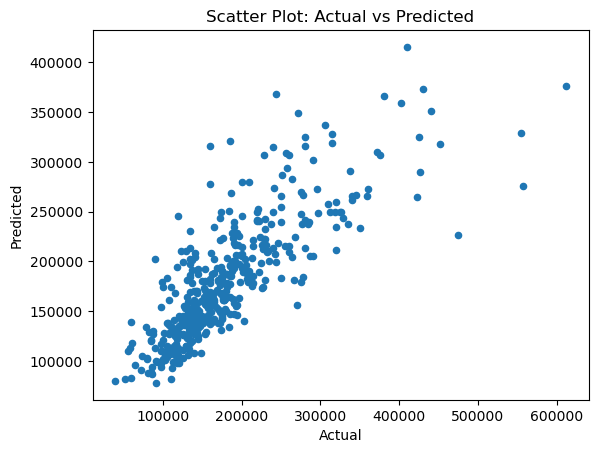

In [43]:
test_data2.plot(x='Actual', y='Predicted', kind='scatter')
plt.title('Scatter Plot: Actual vs Predicted')

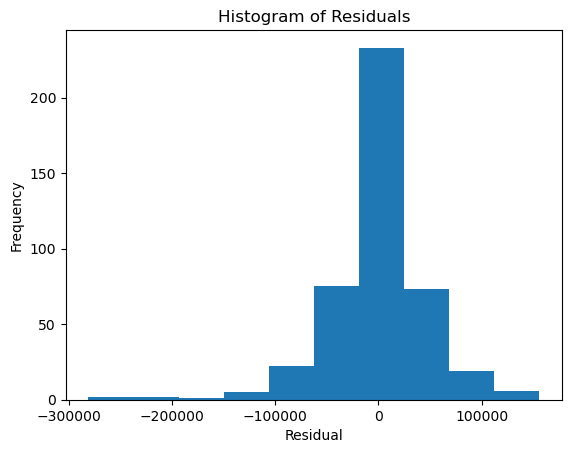

In [44]:
# Calculate residuals
residuals = [predicted - actual for predicted, actual in zip(test_data2['Predicted'], test_data2['Actual'])]

# Create histogram
plt.hist(residuals)  # Adjust the number of bins as per your preference
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

[<a href="#3.Modeling">Back to top</a>]

## if we scale the Data 

__Using Linear regression:__

In [45]:
scaler = StandardScaler()
scaler.fit(X_train)
X_tr_scaled = scaler.transform(X_train)
X_te_scaled = scaler.transform(X_test)

In [46]:
lm = LinearRegression().fit(X_tr_scaled, y_train)
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled )

In [47]:
mae = mean_absolute_error(y_train, y_tr_pred),mean_absolute_error(y_test, y_te_pred)
mae

(12674.34263499359, 3558956587977189.5)

In [48]:
mape = mean_absolute_percentage_error(y_test, y_te_pred)
mape

33295726541.326717

__Using KNN:__

In [49]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the SAME training data
knn_regressor.fit(X_tr_scaled, y_train)


y_tr_pred_knn = knn_regressor.predict(X_tr_scaled)
y_te_pred_knn = knn_regressor.predict(X_te_scaled)


In [50]:
# Calculate MAE
mae = mean_absolute_error(y_train, y_tr_pred_knn ),mean_absolute_error(y_test,y_te_pred_knn)
mae

(20360.157534246577, 27822.49406392694)

In [51]:

mape = mean_absolute_percentage_error(y_test, y_te_pred_knn)
mape

0.15651933976253993

[<a href="#3.Modeling">Back to top</a>]